#### Lesson: Linear Algebra

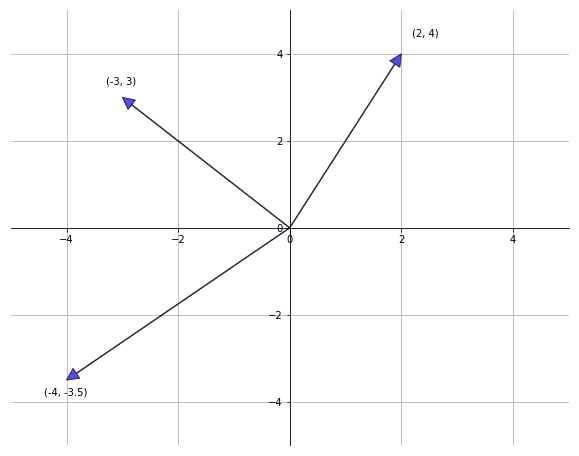

In [1]:
# Vectors

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.7,
                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

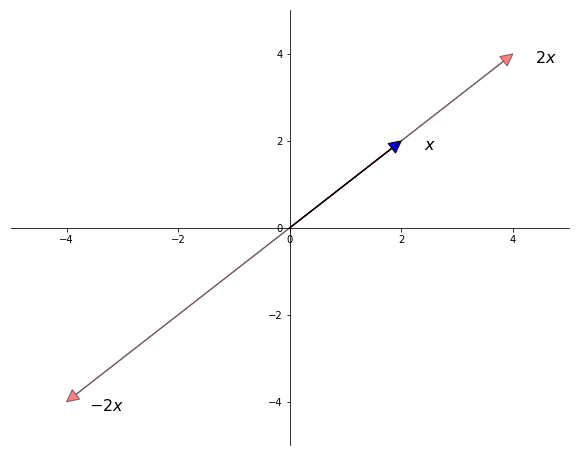

In [2]:
# Multiplication

import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-5, 5), ylim=(-5, 5))
x = (2, 2)
ax.annotate('', xy=x, xytext=(0, 0),
            arrowprops=dict(facecolor='blue',
            shrink=0,
            alpha=1,
            width=0.5))
ax.text(x[0] + 0.4, x[1] - 0.2, '$x$', fontsize='16')


scalars = (-2, 2)
x = np.array(x)

for s in scalars:
    v = s * x
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.5,
                width=0.5))
    ax.text(v[0] + 0.4, v[1] - 0.2, f'${s} x$', fontsize='16')
plt.show()

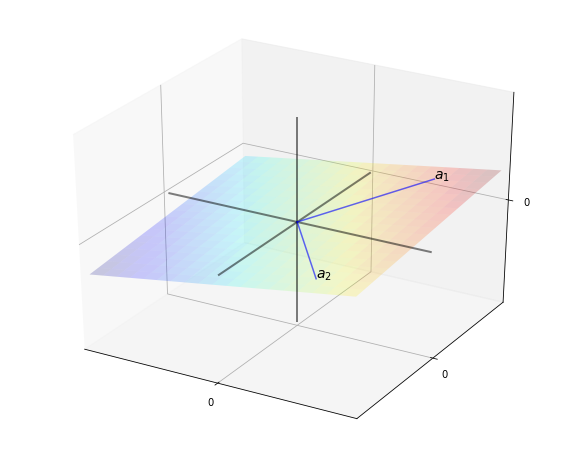

In [3]:
# Span

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 0.2, 0.1

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((3, 3))
y_coords = np.array((4, -4))
z = f(x_coords, y_coords)
for i in (0, 1):
    ax.text(x_coords[i], y_coords[i], z[i], f'$a_{i+1}$', fontsize=14)

# Lines to vectors
for i in (0, 1):
    x = (0, x_coords[i])
    y = (0, y_coords[i])
    z = (0, f(x_coords[i], y_coords[i]))
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)


# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = f(x2, y2)
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
plt.show()

![Ex1](img/linalg_1.png)

![Ex1](img/linalg_2.png)

![Ex1](img/linalg_3.png)

![Ex1](img/linalg_4.png)

#### Lesson: Orthogonal Projections and Their Applications

skipping

#### Lesson: LLN and CLT

skipping

#### Lesson: Linear State Space Models

![Pic1](img/lssm_1.png)

![Pic2](img/lssm_2.png)

Exercise 1: Replicate this graph.

![Ex1](img/lssm_3.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LinearStateSpace

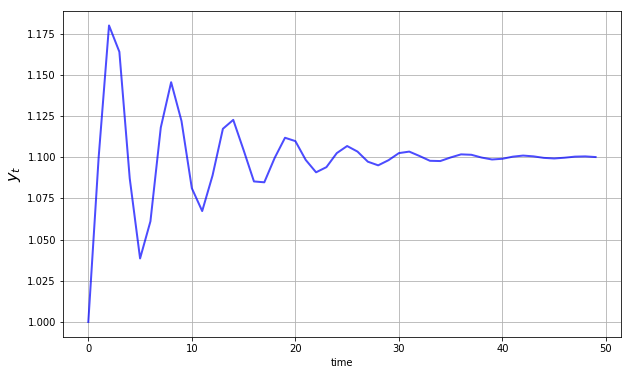

In [4]:
ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8

A = [[1,     0,     0  ],
     [ϕ_0,   ϕ_1,   ϕ_2],
     [0,     1,     0  ]]
C = np.zeros((3, 1))
G = [0, 1, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(3))
x, y = ar.simulate(ts_length=50)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

Ezercise 2: Repliate the graph

![Ex2](img/lssm_4.png)

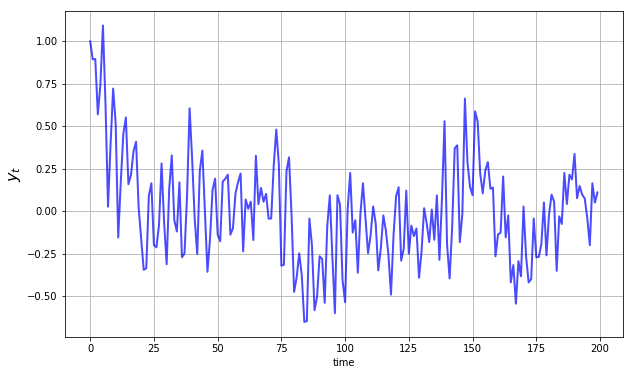

In [6]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
x, y = ar.simulate(ts_length=200)

fig, ax = plt.subplots(figsize=(10, 6))
y = y.flatten()
ax.plot(y, 'b-', lw=2, alpha=0.7)
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('$y_t$', fontsize=16)
plt.show()

Exercise 3: Replicate the graph
    
![Ex3](img/lssm_5.png)

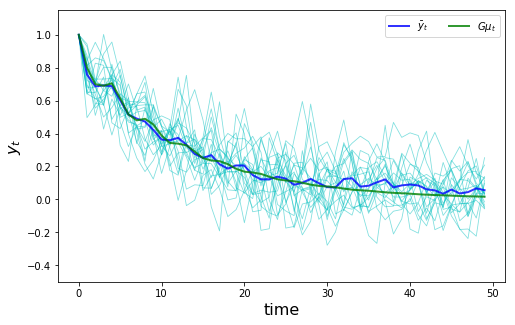

In [7]:
from scipy.stats import norm
import random

ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

I = 20
T = 50
ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))
ymin, ymax = -0.5, 1.15

fig, ax = plt.subplots(figsize=(8, 5))

ax.set_ylim(ymin, ymax)
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('$y_t$', fontsize=16)

ensemble_mean = np.zeros(T)
for i in range(I):
    x, y = ar.simulate(ts_length=T)
    y = y.flatten()
    ax.plot(y, 'c-', lw=0.8, alpha=0.5)
    ensemble_mean = ensemble_mean + y

ensemble_mean = ensemble_mean / I
ax.plot(ensemble_mean, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')

m = ar.moment_sequence()
population_means = []
for t in range(T):
    μ_x, μ_y, Σ_x, Σ_y = next(m)
    population_means.append(float(μ_y))
ax.plot(population_means, color='g', lw=2, alpha=0.8, label='$G\mu_t$')
ax.legend(ncol=2)
plt.show()

Exercise 4: Replicate the graph
    
![Ex3](img/lssm_6.png)

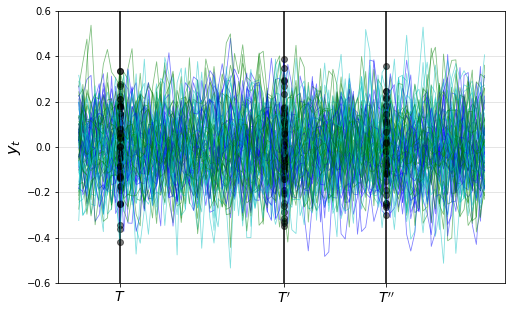

In [8]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
     [1,     0,     0,     0  ],
     [0,     1,     0,     0  ],
     [0,     0,     1,     0  ]]
C = [[σ],
     [0],
     [0],
     [0]]
G = [1, 0, 0, 0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LinearStateSpace(A, C, G, mu_0=np.ones(4), Sigma_0=Σ_x)
ymin, ymax = -0.6, 0.6

fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(alpha=0.4)
ax.set_ylim(ymin, ymax)
ax.set_ylabel('$y_t$', fontsize=16)
ax.vlines((T0, T1, T2), -1.5, 1.5)

ax.set_xticks((T0, T1, T2))
ax.set_xticklabels(("$T$", "$T'$", "$T''$"), fontsize=14)

μ_x, μ_y, Σ_x, Σ_y = ar.stationary_distributions()
ar.mu_0 = μ_x
ar.Sigma_0 = Σ_x

for i in range(80):
    rcolor = random.choice(('c', 'g', 'b'))
    x, y = ar.simulate(ts_length=T4)
    y = y.flatten()
    ax.plot(y, color=rcolor, lw=0.8, alpha=0.5)
    ax.plot((T0, T1, T2), (y[T0], y[T1], y[T2],), 'ko', alpha=0.5)
plt.show()

#### Lesson: Finite Markov Chains

In [1]:
import quantecon as qe
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import MarkovChain
import re
from operator import itemgetter

In [2]:
ψ = (0.1, 0.9)           # Probabilities over sample space {0, 1}
cdf = np.cumsum(ψ)
qe.random.draw(cdf, 5)   # Generate 5 independent draws from ψ

array([1, 1, 1, 1, 1])

In [3]:
def mc_sample_path(P, init=0, sample_size=1000):
    # Make sure P is a NumPy array
    P = np.asarray(P)
    # Allocate memory
    X = np.empty(sample_size, dtype=int)
    X[0] = init
    # Convert each row of P into a distribution
    # In particular, P_dist[i] = the distribution corresponding to P[i, :]
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]

    # Generate the sample path
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return X

The fraction of sample taking value 0 shouls be around 0.25:

In [4]:
P = [[0.4, 0.6], [0.2, 0.8]]
X = mc_sample_path(P, sample_size=100000)
np.mean(X == 0)

0.2497

Same with QuantEcon lib:

In [5]:
P = [[0.4, 0.6], [0.2, 0.8]]
mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1000000)
np.mean(X == 0)

0.250336

Difference between a regular fuction and JIT one:

In [6]:
%timeit mc_sample_path(P, sample_size=1000000) # Our version

1.63 s ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit mc.simulate(ts_length=1000000) # qe version

68.2 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
mc = qe.MarkovChain(P, state_values=('unemployed', 'employed'))
mc.simulate(ts_length=4, init='employed')

array(['employed', 'employed', 'employed', 'unemployed'], dtype='<U10')

In [9]:
mc.simulate_indices(ts_length=4)

array([0, 1, 1, 1])

Checking if a stochastic matrix is irreducible:

In [10]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

Also finding the communication classes:

In [11]:
mc.communication_classes

[array(['poor', 'middle', 'rich'], dtype='<U6')]

Check for periodicaliy:

In [13]:
P = [[0, 1, 0],
     [0, 0, 1],
     [1, 0, 0]]

mc = qe.MarkovChain(P)
mc.period

3

In [14]:
P = [[0.0, 1.0, 0.0, 0.0],
     [0.5, 0.0, 0.5, 0.0],
     [0.0, 0.5, 0.0, 0.5],
     [0.0, 0.0, 1.0, 0.0]]

mc = qe.MarkovChain(P)
mc.period

2

In [15]:
mc.is_aperiodic

False

Searching for stationary distributions:

In [16]:
P = [[0.4, 0.6], [0.2, 0.8]]
mc = qe.MarkovChain(P)
mc.stationary_distributions  # Show all stationary distributions

array([[0.25, 0.75]])

Exercise 1
    
![Ex1](img/fmc_1.png)

![Ex1](img/fmc_2.png)

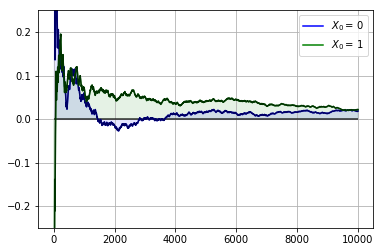

In [24]:
N = 10000
a = b = 0.1

P = np.array([[1-a, a],[b, 1-b]])

mc = qe.MarkovChain(P)

fig, ax = plt.subplots()
#Decoration part:
ax.set_ylim(-0.25, 0.25)
ax.grid()
ax.hlines(0, 0, N, lw=2, alpha=0.6)   

cols = ('blue', 'green')
for X_0 in (0,1):
    X = mc.simulate(N, init=X_0)
    X_bar = (X == 0).cumsum() / (1 + np.arange(N, dtype=float))
    ax.fill_between(range(N), np.zeros(N), X_bar - p, color=cols[X_0], alpha=0.1)
    ax.plot(X_bar - p, color=cols[X_0], label=f'$X_0 = \, {X_0} $')
    ax.plot(X_bar - p, 'k-', alpha=0.6)

ax.legend(loc='upper right')
plt.show()

Exercise 2 - page ranking using Markov Chains:

![Ex2](img/fmc_3.png)

In [27]:
file = 'web_graph_data.txt'
alphabet = 'abcdefghijklmnopqrstuvwxyz'

n = 14

# Matrix with indicators of links:
Q = np.zeros((n, n), dtype=int)
f = open(file, 'r')
links = f.readlines()
f.close()

for link in links:
    page1, page2 = re.findall('\w', link)
    i, j = alphabet.index(page1), alphabet.index(page2)
    Q[i, j] = 1
    
# Now Markov matrix
P = np.empty((n, n))
for i in range(n):
    P[i, :] = Q[i, :] / Q[i, :].sum()
mc = qe.MarkovChain(P)


r = mc.stationary_distributions[0]
ranked_pages = {alphabet[i] : r[i] for i in range(n)}

# Solutions, sorted from highest to lowest rank
for name, rank in sorted(ranked_pages.items(), key=itemgetter(1), reverse=1):
    print(f'{name}: {rank:.4}')


g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.09106
b: 0.08326
e: 0.05312
i: 0.05312
c: 0.04834
h: 0.0456
l: 0.03202
d: 0.03056
f: 0.01164
a: 0.002911


#### Lesson: Continuous State Markov Chains

Exercise 1
    
![Ex1](img/csmc_1.png)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import lognorm, beta
from quantecon import LAE
from scipy.stats import norm, gaussian_kde

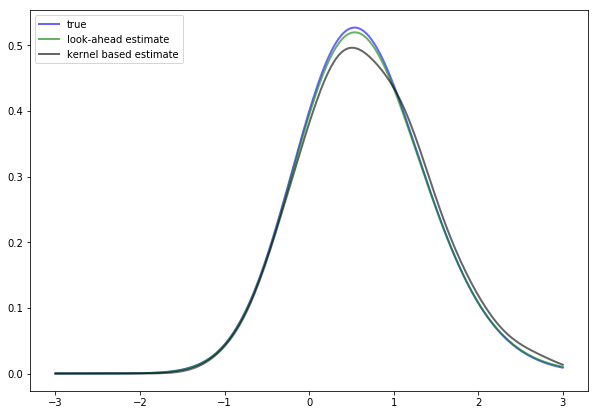

In [36]:
n = 500
theta = 0.8
f = norm()

thau = lambda y : 2 * norm.pdf(y) * norm.cdf((theta * y)/(1-theta ** 2) ** (1/2))    
ker = lambda x_t,  x_t1 : f.pdf((x_t1 - theta * np.abs(x_t)) / (1 - theta **2) ** (1/2)) / d

Z = ϕ.rvs(n)
X = np.empty(n)
for t in range(n-1):
    X[t+1] = θ * np.abs(X[t]) + np.sqrt(1 - θ**2) * Z[t]
thau_estimated = LAE(ker, X)
k_estimated = gaussian_kde(X)

fig, ax = plt.subplots(figsize=(10, 7))
ys = np.linspace(-3, 3, 200)
ax.plot(ys, thau(ys), 'b-', lw=2, alpha=0.6, label='true')
ax.plot(ys, thau_estimated(ys), 'g-', lw=2, alpha=0.6, label='look-ahead estimate')
ax.plot(ys, k_estimated(ys), 'k-', lw=2, alpha=0.6, label='kernel based estimate')
ax.legend(loc='upper left')
plt.show()

Exercise 2
    
![Ex2](img/csmc_2.png)

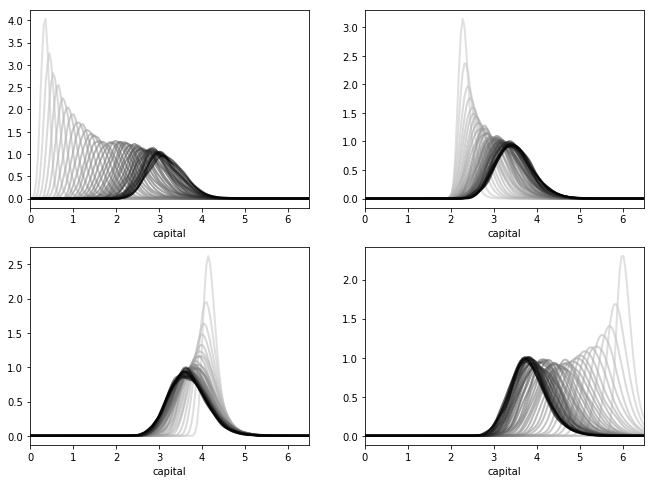

In [38]:
# Solution left unchanged

s = 0.2
δ = 0.1
a_σ = 0.4                                # A = exp(B) where B ~ N(0, a_σ)
α = 0.4                                  # f(k) = k**α

ϕ = lognorm(a_σ)

def p(x, y):
    "Stochastic kernel, vectorized in x.  Both x and y must be positive."
    d = s * x**α
    return ϕ.pdf((y - (1 - δ) * x) / d) / d

n = 1000                            # Number of observations at each date t
T = 40                              # Compute density of k_t at 1,...,T

fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()
xmax = 6.5

for i in range(4):
    ax = axes[i]
    ax.set_xlim(0, xmax)
    ψ_0 = beta(5, 5, scale=0.5, loc=i*2)  # Initial distribution

    # == Generate matrix s.t. t-th column is n observations of k_t == #
    k = np.empty((n, T))
    A = ϕ.rvs((n, T))
    k[:, 0] = ψ_0.rvs(n)
    for t in range(T-1):
        k[:, t+1] = s * A[:,t] * k[:, t]**α + (1 - δ) * k[:, t]

    # == Generate T instances of lae using this data, one for each t == #
    laes = [LAE(p, k[:, t]) for t in range(T)]

    ygrid = np.linspace(0.01, xmax, 150)
    greys = [str(g) for g in np.linspace(0.0, 0.8, T)]
    greys.reverse()
    for ψ, g in zip(laes, greys):
        ax.plot(ygrid, ψ(ygrid), color=g, lw=2, alpha=0.6)
    ax.set_xlabel('capital')
plt.show()

Exercise 3
    
![Ex2](img/csmc_3.png)

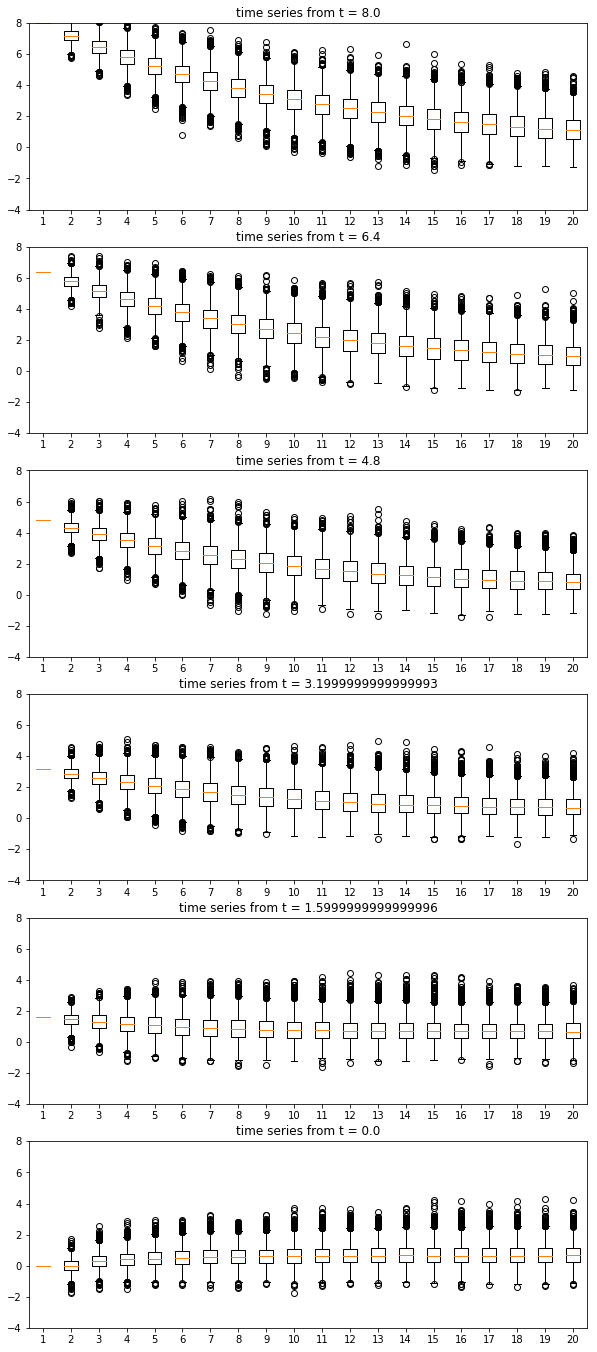

In [40]:
n = 20
k = 5000
J = 6

θ = 0.9
d = np.sqrt(1 - θ**2)
δ = θ / d

fig, axes = plt.subplots(J, 1, figsize=(10, 4*J))
initial_conditions = np.linspace(8, 0, J)
X = np.empty((k, n))

for j in range(J):

    axes[j].set_ylim(-4, 8)
    axes[j].set_title(f'time series from t = {initial_conditions[j]}')

    Z = np.random.randn(k, n)
    X[:, 0] = initial_conditions[j]
    for t in range(1, n):
        X[:, t] = θ * np.abs(X[:, t-1]) + d * Z[:, t]
    axes[j].boxplot(X)

plt.show()